CARGAMOS LIBRERÍAS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from google.colab import files
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#cargamos el archivo
parcial = '/content/drive/MyDrive/IFTS/EXPDATOS/Dataset.xlsx' #ingresamos la ruta del archivo
df = pd.read_excel(parcial) #definimos el data frame

CONSIGNA

Base sobre prestamos:

Explorar los datos para identificar si hay factores que influyen en la aprobación o el rechazo de una solicitud de préstamo.

* Convertir variables en formatos adecuados para el análisis y el modelado si es necesario
* identificar valores faltantes y decidir las técnicas de imputación adecuadas
* utilizar métodos y visualizaciones adecuados para identificar valores atípicos
* generar estadísticas resumidas para todas las características para comprender su distribución y variabilidad
* explorar las relaciones entre las características y analizar qué características son las más importantes para la aprobación del préstamo, por ejemplo,
  ¿existe una diferencia en las tasas de aprobación según los ingresos del solicitante? Según su análisis, resuma los conocimientos clave sobre qué factores influyen en el resultado de la solicitud de préstamo. Analice las recomendaciones para futuros solicitantes con el fin de aumentar sus posibilidades de obtener la aprobación del préstamo (según el análisis de datos).

**ENTREGABLE**

1. Pasos de preprocesamiento de datos.

2. Análisis exploratorio de datos, incluidas visualizaciones y estadísticas resumidas.

3. Análisis de la importancia de las características y perspectivas.

4. Conclusiones sobre los factores que determinan los resultados de las solicitudes de préstamo.

CARACTERISTICAS:

El conjunto de datos consta de las siguientes características:

• Loan_ID: identificador único para cada solicitud de préstamo.

• Gender: género del solicitante.

• Married: si el solicitante está casado.

• Dependents: número de dependientes que tiene el solicitante.

• Education: nivel educativo del solicitante (graduado/no graduado).

• Self_Employed: si el solicitante es autónomo.

• ApplicantIncome: ingresos del solicitante.

• CoapplicantIncome: ingresos del cosolicitante (si corresponde).

• LoanAmount: el monto del préstamo solicitado por el solicitante.

• Loan_Amount_Term: el plazo (en meses) del reembolso del préstamo.

• Credit_History: si el solicitante tiene un historial de reembolso de préstamos.

• Property_Area: el área donde se encuentra la propiedad del solicitante.

• Loan_Status: la variable de destino que indica si se aprobó la solicitud de préstamo (Sí/No).

VEMOS LA INFORMACION

In [ ]:
#Ver el tipo de cada columna con .dtypes
print(df.dtypes)
#Devuelve las 5 primeras filas
df.head(5)
# Verificar información general de los datos
df.info() #Con esto sabemos que estamos hablando de 617 REGISTROS.

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            607 non-null    object 
 1   Gender             604 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         604 non-null    object 
 4   Education          617 non-null    object 
 5   Self_Employed      585 non-null    object 
 6   ApplicantIncome    617 non-null    int64  
 7   CoapplicantIncome  617 non-null    float64
 8   LoanAmount         

In [ ]:
#buscamos los nulls y NA
#df.isnull().sum()
df.isna().sum()
#Comparamos los 2 resultados y vemos que tratan de lo mismo. (coinciden)

,0
Loan_ID,10
Gender,13
Married,3
Dependents,13
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


Entendemos que Loan ID no es importante ya que no vamos a anexar la tabla a ninguna otra.

In [ ]:
df = df.drop('Loan_ID', axis=1)
#Verificamos
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


ENTENDEMOS QUE SI NO SE COMPLETO EL MONTO DEL CREDITO, NO VALE LA PENA ESTUDIAR EL MISMO, POR LO QUE SE BORRAN LAS FILAS CORRESPONDIENTES A LOS NA DE LOAN_AMONT

In [ ]:
# Eliminar filas donde LoanAmount es 0
df = df[df['LoanAmount'] != 0]

#eliminamos donde loan amount sea null
df = df.dropna(subset=['LoanAmount'])
# Verificamos
print(df['LoanAmount'].value_counts())

LoanAmount
120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
436.0     1
207.0     1
330.0     1
304.0     1
253.0     1
Name: count, Length: 204, dtype: int64


Vamos a transformar "Gender" en 0: Female y 1: Male

In [ ]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

# Verificamos
df[['Gender']].head()

,Gender
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0


Realizamos conteo de mujer y hombres

In [ ]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)

Gender
1.0    472
0.0    110
Name: count, dtype: int64


Con esta informacion sabemos que cada 4 hombres hay una mujer, por lo que podriamos utilizar la misma regla para completar los nuls.
siendo que de los 13 nuls por lo que quedarian 3 mujeres, 10 hombres aprox.


In [ ]:
# Buscamos donde Gender es nulo
gender_null_indices = df[df['Gender'].isnull()].index

# Completar 10 valores como 1 (Male) y 3 valores como 0 (Female)
df.loc[gender_null_indices[:10], 'Gender'] = 1  # Asignamos los primeros 10 nulos con 1
df.loc[gender_null_indices[10:], 'Gender'] = 0  # Los últimos 3 nulos con 0

# Verificar que noo hay mas valores nulos
print(df['Gender'].isnull().sum())

0


In [ ]:
# Verificamos tipo de variable
df['Gender'].dtype #da un float, lo cambiamos a int.
df['Gender'] = df['Gender'].astype(int)
df['Gender'].dtype

dtype('int64')

TERMINAMOS CON GENDER

In [ ]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


SEGUIMOS CON LOS DEPENDENTS.

In [ ]:
# Filtrar donde la columna es nulo
df_filtrado = df[df['Dependents'].isnull()]

# Mostrar las filas filtradas
df_filtrado

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,1,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,1,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
228,1,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,0,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,1,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
335,1,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,1,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N
355,0,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,Y
517,1,Yes,NaN,Not Graduate,No,3074,1800.0,123.0,360.0,0.0,Semiurban,N
571,1,Yes,NaN,Graduate,No,5116,1451.0,165.0,360.0,0.0,Urban,N


VAMOS A ESTABLECER QUE LOS DEPENDANTS EN ESTS CASOS SON 0.

In [ ]:
df['Dependents'].fillna(0, inplace=True)

# Verificamos
print(df['Dependents'].isnull().sum())

# Vemos los valores unicos
print(df['Dependents'].unique())

0
[1 0 2 '3+' 7 10 '4+' 4]


Con esto notamos que hay un valor de 3+, todo dependent que tenga mas de 3, lo usaremos en esa categoria. para volver la columna categorica, ya que empieza siendo inexacta, utilizaremos el termino 3 como 3 o mas de 3.

In [ ]:
df['Dependents'] = df['Dependents'].replace({ '3+': 3, 7: 3, 10: 3, '4+': 3, 4: 3 })

# Verificamos
print(df['Dependents'].unique())

[1 0 2 3]


FINALIZAMOS CON DEPENDANT

TRABAJAMOS MARRIED 1 PARA MARRIED, 0 PARA NOT MARRIED.

VERIFICAMOS LOS NULLS DE MARRIED

In [ ]:
df['Married'] = df['Married'].map({'No': 0, 'Yes': 1})

In [ ]:
# Filtrar donde la columna es nulo
df_filtrado = df[df['Married'].isnull()]

df_filtrado

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,1,NaN,0,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,1,NaN,0,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
582,0,NaN,0,Graduate,No,316666,0.0,36000.0,360.0,1.0,Semiurban,Y
583,1,NaN,1,Graduate,No,1880,0.0,61.0,360.0,NaN,Rural,N
584,1,NaN,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N
595,1,NaN,0,Not Graduate,No,3833,0.0,110.0,360.0,1.0,Rural,Y
596,1,NaN,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N
597,1,NaN,0,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
598,1,NaN,0,Graduate,Yes,9963,0.0,180.0,360.0,1.0,Rural,Y
599,1,NaN,2,Graduate,No,5780,0.0,192.0,360.0,1.0,Urban,Y


Vamos a suponer que cada persona con hijos (dependants), esta casado.
Completamos segun ese criterio.

In [ ]:
# Reemplazar los NaN en la columna Married según la condición en Dependents
df.loc[df['Married'].isnull(), 'Married'] = df.loc[df['Married'].isnull(), 'Dependents'].apply(lambda x: 1 if x > 0 else 0)

# Verificamos
print(df['Married'].isnull().sum())

0


FINALIZAMOS CON MARRIED

REVISAMOS DATOS NULOS Y NAN EN EDUCATION

In [ ]:
# Filtrar donde la columna es nulo
df_filtrado = df[df['Education'].isnull()]

# Mostrar las filas filtradas
df_filtrado

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


REVISAMOS Self_Employed

In [ ]:
# Filtrar donde la columna es nulo
df_filtrado = df[df['Self_Employed'].isnull()]

# Mostrar las filas filtradas
df_filtrado

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,1,1.0,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,1,1.0,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,1,1.0,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,0,0.0,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,1,1.0,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
107,1,0.0,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,0,1.0,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,1,0.0,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,1,0.0,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y
170,1,1.0,0,Not Graduate,NaN,1820,1769.0,95.0,360.0,1.0,Rural,Y


Quiero ver los self empoyed y el rango de aplicant income, a ver si podemos establecer alguna relacion.



In [ ]:
# Agrupar por Self_Employed y calcular estadísticas descriptivas para ApplicantIncome
agrupo_self_employed = df.groupby('Self_Employed')['ApplicantIncome'].describe()

# Mostrar el rango de ApplicantIncome para cada categoría de Self_Employed
print(agrupo_self_employed)

               count          mean            std     min     25%     50%  \
Self_Employed                                                               
0                6.0   4250.500000    3218.691955  1668.0  2065.0  2857.5   
No             479.0   5693.423800   15346.068605   150.0  2874.0  3708.0   
Yes             79.0  27653.518987  180634.112280   674.0  3454.5  5800.0   

                  75%        max  
Self_Employed                     
0              5676.5     9703.0  
No             5300.5   316666.0  
Yes            9458.5  1612000.0  


Llevamos los "no" a 0, y los Yes a 1

In [ ]:
# Convertir los valores 'No' a 0 y 'Yes' a 1 en la columna Self_Employed
df['Self_Employed'] = df['Self_Employed'].map({'No': 0, 'Yes': 1})

# Verificar los cambios
print(df['Self_Employed'].value_counts())

Self_Employed
0.0    479
1.0     79
Name: count, dtype: int64


Con esto sabemos que ningun self emplyed baja de 674.0 por lo que completaremos cualquier NAN por de self employed que este por debajo de ese income como un "no" automatico.

In [ ]:
# Actualizar Self_Employed a "No" si ApplicantIncome es menor de 674.0
df.loc[(df['Self_Employed'].isnull()) & (df['ApplicantIncome'] < 674.0), 'Self_Employed'] = 0

# Verificamos
print(df['Self_Employed'].isnull().sum())  # Debería mostrar el número de NaNs restantes

# Mostrar los valores únicos de Self_Employed para verificar los cambios
print(df['Self_Employed'].unique())

35
[ 0.  1. nan]


In [ ]:
print(df['Self_Employed'].unique())

[ 0.  1. nan]


Todo aquel por debajo de la media, de selfemployed = 0 les pondremos ese valor.

In [ ]:
# Actualizar Self_Employed a "No" si ApplicantIncome es menor de 5657.0
df.loc[(df['Self_Employed'].isnull()) & (df['ApplicantIncome'] < 5657.0), 'Self_Employed'] = 0

# Actualizamos Self_Employed a "Si" si ApplicantIncome es menor de 5657.0
df.loc[(df['Self_Employed'].isnull()) & (df['ApplicantIncome'] > 5657.0), 'Self_Employed'] = 1

# Verificamos que no queden Nans
print(df['Self_Employed'].isnull().sum())

0


In [ ]:
print(df['Self_Employed'].value_counts())

Self_Employed
0.0    509
1.0     86
Name: count, dtype: int64


REVISAMOS ApplicantIncome

In [ ]:
# Filtrar donde la columna es nulo
df_filtrado = df[df['ApplicantIncome'].isnull()]

# Mostrar las filas filtradas
df_filtrado

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


REVISAMOS CoapplicantIncome

In [ ]:
# Filtrar donde la columna es nulo
df_filtrado = df[df['CoapplicantIncome'].isnull()]

# Mostrar las filas filtradas
df_filtrado

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


REVISAMOS LoanAmount

In [ ]:
# Filtrar donde la columna es nulo
df_filtrado = df[df['LoanAmount'].isnull()]

# Mostrar las filas filtradas
df_filtrado

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


REVISAMOS Loan_Amount_Term

In [ ]:
# Filtrar donde la columna es nulo
df_filtrado = df[df['Loan_Amount_Term'].isnull()]

# Mostrar las filas filtradas
df_filtrado

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,1,1.0,0,Graduate,0.0,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,1,1.0,0,Graduate,0.0,1828,1330.0,100.0,NaN,0.0,Urban,N
44,1,1.0,0,Not Graduate,1.0,4695,0.0,96.0,NaN,1.0,Urban,Y
45,0,0.0,0,Graduate,0.0,3410,0.0,88.0,NaN,1.0,Urban,Y
73,1,1.0,3,Not Graduate,0.0,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,1,1.0,0,Not Graduate,0.0,3572,4114.0,152.0,NaN,0.0,Rural,N
165,1,1.0,0,Graduate,0.0,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,0,0.0,0,Not Graduate,0.0,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,1,1.0,0,Graduate,0.0,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,1,0.0,0,Not Graduate,0.0,3189,2598.0,120.0,NaN,1.0,Rural,Y


VERIFICAMOS CUALES SON LOS POSIBLES VALORES DE LOAN AMOUNT.

In [ ]:
# Verificar los valores únicos en la columna Loan_Amount_Term
unique_loan_amount_terms = df['Loan_Amount_Term'].unique()

# Mostrar los valores únicos
print(unique_loan_amount_terms)

[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]


VAMOS A BUSCAR EN CUANTO SE SOLIAN DEVOLVER LOS PRESTAMOSO MENROES DE 200 (COMO LOS NANS QUE ESTAMOS VIENDO)

In [ ]:
# Filtrar los pedidos donde LoanAmount es inferior a 200 y Loan_Amount_Term no es NaN
filtered_df = df[(df['LoanAmount'] < 200) & (df['Loan_Amount_Term'].notna())]

# Mostrar los primeros resultados del DataFrame filtrado
print(filtered_df.head())

   Gender  Married  Dependents     Education  Self_Employed  ApplicantIncome  \
1       1      1.0           1      Graduate            0.0             4583   
2       1      1.0           0      Graduate            1.0             3000   
3       1      1.0           0  Not Graduate            0.0             2583   
4       1      0.0           0      Graduate            0.0             6000   
6       1      1.0           0  Not Graduate            0.0             2333   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
6             1516.0        95.0             360.0             1.0   

  Property_Area Loan_Status  
1         Rural           N  
2         Urban           Y  
3       

COMO TODOS DICEN 360, VAMOS A DARLE ESE VALOR.

In [ ]:
# Reemplazar los valores NaN en la columna Loan_Amount_Term por 360.0
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(360.0)

# Verificamos
print(df['Loan_Amount_Term'].isnull().sum())

0


REVISAMOS Credit_History

In [ ]:
# Filtrar donde la columna es nulo
df_filtrado = df[df['Credit_History'].isnull()]

# Mostrar las filas filtradas
df_filtrado

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,1,0.0,1,Not Graduate,0.0,3596,0.0,100.0,240.0,NaN,Urban,Y
24,1,1.0,1,Graduate,0.0,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,1,1.0,1,Graduate,0.0,4166,3369.0,201.0,360.0,NaN,Urban,N
42,1,1.0,0,Graduate,0.0,2400,0.0,75.0,360.0,NaN,Urban,Y
79,1,1.0,3,Not Graduate,1.0,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,1,1.0,0,Graduate,0.0,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,1,1.0,2,Not Graduate,0.0,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
117,1,1.0,1,Graduate,0.0,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,0,0.0,0,Graduate,0.0,3692,0.0,93.0,360.0,NaN,Rural,Y
129,1,1.0,0,Graduate,0.0,6080,2569.0,182.0,360.0,NaN,Rural,N


In [ ]:
# Verificar los valores únicos en la columna Credit_History
unique_Credit_History = df['Credit_History'].unique()

# Mostrar los valores únicos
print(unique_Credit_History)

#contarlos
df['Credit_History'].value_counts()

[ 1.  0. nan]


,count
Credit_History,
1.0,460
0.0,86


In [ ]:
#Vemos cuantos son nulls
df['Credit_History'].isnull().sum()

49

POR SU GRAN VOLUMEN, NO QUEREMOS BORRAR LOS DATOS, POR LO QUE VAMOS A COMPLETAR CON LA PROPORCION QUE TENEMOS HASTA EL MOMENTO (5 A 1)

COMO SON 49, COMPLETAREMOS 40 "1" y 9 "0" (con el fin de mantener la proporcion)

In [ ]:
# Buscamos donde Credit_History es nulo
Credit_History_null_indices = df[df['Credit_History'].isnull()].index

# Completar 10 valores como 1 (Male) y 3 valores como 0 (Female)
df.loc[Credit_History_null_indices[:40], 'Credit_History'] = 1  # Asignamos los primeros 40 nulos con 1
df.loc[Credit_History_null_indices[40:], 'Credit_History'] = 0  # Los últimos 9 nulos con 0

# Verificar que noo hay mas valores nulos
print(df['Credit_History'].isnull().sum())

0


REVISAMOS Property_Area

In [ ]:
# Filtrar donde la columna es nulo
df_filtrado = df[df['Property_Area'].isnull()]

# Mostrar las filas filtradas
df_filtrado

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


REVISAMOS Loan_Status

In [ ]:
# Filtrar donde la columna es nulo
df_filtrado = df[df['Loan_Status'].isnull()]

# Mostrar las filas filtradas
df_filtrado

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


VERIFICAMOS LA INTEGRIDAD DEL DF

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595 entries, 1 to 616
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             595 non-null    int64  
 1   Married            595 non-null    float64
 2   Dependents         595 non-null    int64  
 3   Education          595 non-null    object 
 4   Self_Employed      595 non-null    float64
 5   ApplicantIncome    595 non-null    int64  
 6   CoapplicantIncome  595 non-null    float64
 7   LoanAmount         595 non-null    float64
 8   Loan_Amount_Term   595 non-null    float64
 9   Credit_History     595 non-null    float64
 10  Property_Area      595 non-null    object 
 11  Loan_Status        595 non-null    object 
dtypes: float64(6), int64(3), object(3)
memory usage: 76.6+ KB


CON ESTO VEMOS QUE PERDIMOS POCOS DATOS.

# EXPLORACION DE LOS DATOS

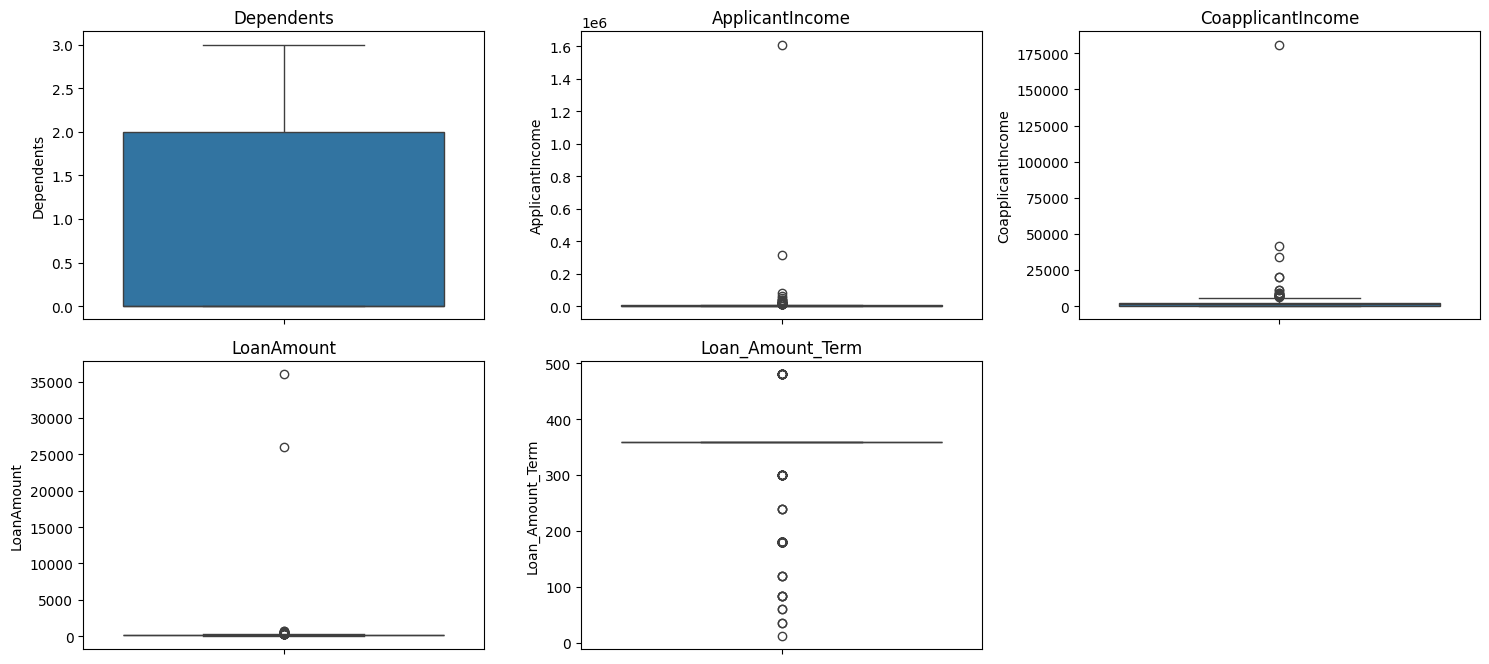

In [ ]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 10))

# Lista de columnas numéricas para graficar
columnas_numericas = ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Crear un boxplot para cada columna numérica
for i, columna in enumerate(columnas_numericas):
    plt.subplot(3, 3, i + 1)  # Configurar la subgrilla para múltiples gráficos
    sns.boxplot(y=df[columna])
    plt.title(columna)

# Ajustar el diseño del gráfico
plt.tight_layout()
plt.show()

'ApplicantIncome', 'CoapplicantIncome' nos muestran un ouotlier significativo, lo buscamos

In [ ]:
df.sort_values(by='LoanAmount', ascending=False)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
582,0,0.0,0,Graduate,0.0,316666,0.0,36000.0,360.0,1.0,Semiurban,Y
594,1,1.0,0,Graduate,1.0,1612000,181100.0,26000.0,360.0,1.0,Urban,Y
171,1,1.0,3,Graduate,0.0,51763,0.0,700.0,300.0,1.0,Urban,Y
130,1,0.0,0,Graduate,1.0,20166,0.0,650.0,480.0,1.0,Urban,Y
561,0,1.0,1,Graduate,1.0,19484,0.0,600.0,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
555,1,1.0,1,Graduate,0.0,5468,1032.0,26.0,360.0,1.0,Semiurban,Y
133,1,1.0,0,Graduate,1.0,3459,0.0,25.0,120.0,1.0,Semiurban,Y
94,1,0.0,0,Not Graduate,0.0,3620,0.0,25.0,120.0,1.0,Semiurban,Y
14,1,1.0,2,Graduate,0.0,1299,1086.0,17.0,120.0,1.0,Urban,Y


CON ESTO VEMOS QUE LOS OUTLIERS TIENEN SENTIDO, YA QUE CORRESPONDEN CON SUS INGRESOS, O CON LOS INGRESOS DE SUS CO-APLICANTES, POR LOS QUE SE DEFINEN DEJAR LOS MISMOS YA QUE SON PARTE DE LA MUESTRA.

TRANSFORMAMOS EDUCATION EN VARIABLES CATEGORICAS.

In [ ]:
df['Education'].unique()

array(['Graduate', 'Not Graduate', 0, 1], dtype=object)

In [ ]:
# Reemplazar 'Not Graduate' con 0 y 'Graduate' con 1
df['Education'] = df['Education'].replace({'Not Graduate': 0, 'Graduate': 1})

# Verificamos
print(df['Education'].unique())

[1 0]


TRANSFORMAMOS Property_Area EN VARIABLE CATEGORICA

In [ ]:
df['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

VAMOS A REEMPLAZAR SEGUN EL SIGUIENTE MAPA:

0: RURAL

1: SEMI URBAN

2: URBAN

In [ ]:
# Reemplazar los valores en Property_Area con números
df['Property_Area'] = df['Property_Area'].replace({'Rural': 0, 'Semiurban': 1, 'Urban': 2})

# Verificar la transformación
print(df['Property_Area'].unique())

[0 2 1]


TRANSFORMAMOS 'Loan_Status' EN VARIABLE CATEGORICA.

In [ ]:
# Reemplazar 'N' con 0 y 'Y' con 1 en la columna Loan_Status
df['Loan_Status'] = df['Loan_Status'].replace({'N': 0, 'Y': 1})

# Verificar la transformación
print(df['Loan_Status'].unique())

[0 1]


LOS OUTLIERS NO NOS PREOCUPAN YA QUE SE DEFINIERON COMO PARTE DE LA MUESTRA, YA QUE SEGUN LAS OTRAS COLUMNAS PARECIERAN SER VIABLES.

In [ ]:
df.sort_values(by='LoanAmount', ascending=True)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
568,0,0.0,0,1,0.0,2378,0.0,9.0,360.0,1.0,2,0
14,1,1.0,2,1,0.0,1299,1086.0,17.0,120.0,1.0,2,1
133,1,1.0,0,1,1.0,3459,0.0,25.0,120.0,1.0,1,1
94,1,0.0,0,0,0.0,3620,0.0,25.0,120.0,1.0,1,1
555,1,1.0,1,1,0.0,5468,1032.0,26.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
155,1,1.0,3,1,0.0,39999,0.0,600.0,180.0,0.0,1,1
130,1,0.0,0,1,1.0,20166,0.0,650.0,480.0,1.0,2,1
171,1,1.0,3,1,0.0,51763,0.0,700.0,300.0,1.0,2,1
594,1,1.0,0,1,1.0,1612000,181100.0,26000.0,360.0,1.0,2,1


VEMOS LOAN AMOUNTS MUY BAJOS... EXTRAÑAMENTE BAJOS, VAMOS A VERLOS MAS DE CERCA

In [ ]:
# Filtrar las filas donde LoanAmount es menor a 100
low_loan_amounts = df[df['LoanAmount'] < 100]

# Imprimimos para analizar.
print(low_loan_amounts)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
2         1      1.0           0          1            1.0             3000   
6         1      1.0           0          0            0.0             2333   
10        1      1.0           2          1            0.0             3200   
14        1      1.0           2          1            0.0             1299   
17        0      0.0           0          1            0.0             3510   
..      ...      ...         ...        ...            ...              ...   
590       1      1.0           0          1            0.0             3000   
597       1      0.0           0          1            0.0             2987   
609       0      0.0           0          1            0.0             2900   
610       1      1.0           3          1            0.0             4106   
615       1      1.0           2          1            0.0             2957   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

SON DEMASIADOS PARA SER BORRADOS. POR LO QUE DECIDIMOS DEJARLOS (TAL VEZ LA GENTE PIDE 9 DOLARES....)


VISUALIZACION DE LOS DATOS

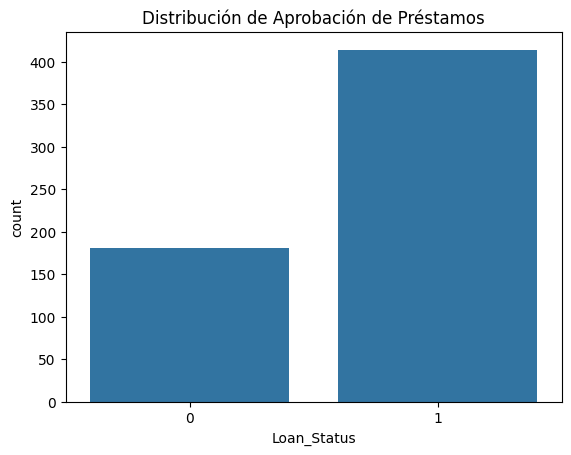

In [ ]:
# Distribución de las solicitudes aprobadas vs rechazadas
sns.countplot(x='Loan_Status', data=df)
plt.title('Distribución de Aprobación de Préstamos')
plt.show()

ESTE GRAFICO NO NOS APORTA DEMASIADO.

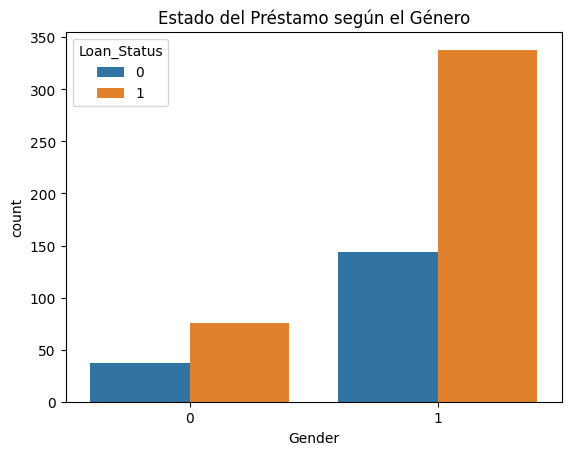

In [ ]:
# Relación entre el género y el estado del préstamo
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.title('Estado del Préstamo según el Género')
plt.show()

LO UNICO QUE PODEMOS CONCLUIR DE ESTO ES QUE LA MAYORIA DE GENTE QUE PIDE PRESTAMOS SON HOMOBRES. (NADA UTIL PARA LO QUE ESTAMOS BUSCANDO)

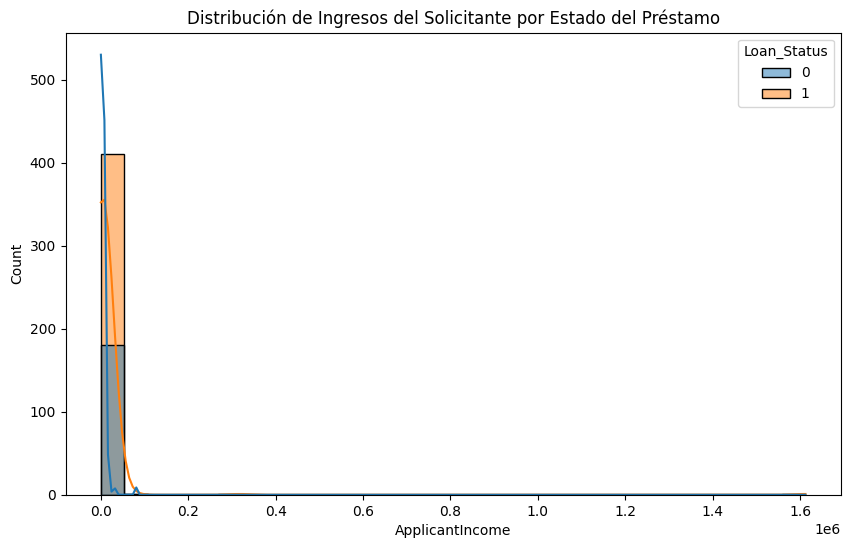

In [ ]:
# Relación entre los ingresos del solicitante y el estado del préstamo
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='ApplicantIncome', hue='Loan_Status', kde=True, bins=30)
plt.title('Distribución de Ingresos del Solicitante por Estado del Préstamo')
plt.show()

NO NOS APORTA ABSOLUTAMENTE NADA.

HACEMOS UNA MATRIZ DE CORRELACION

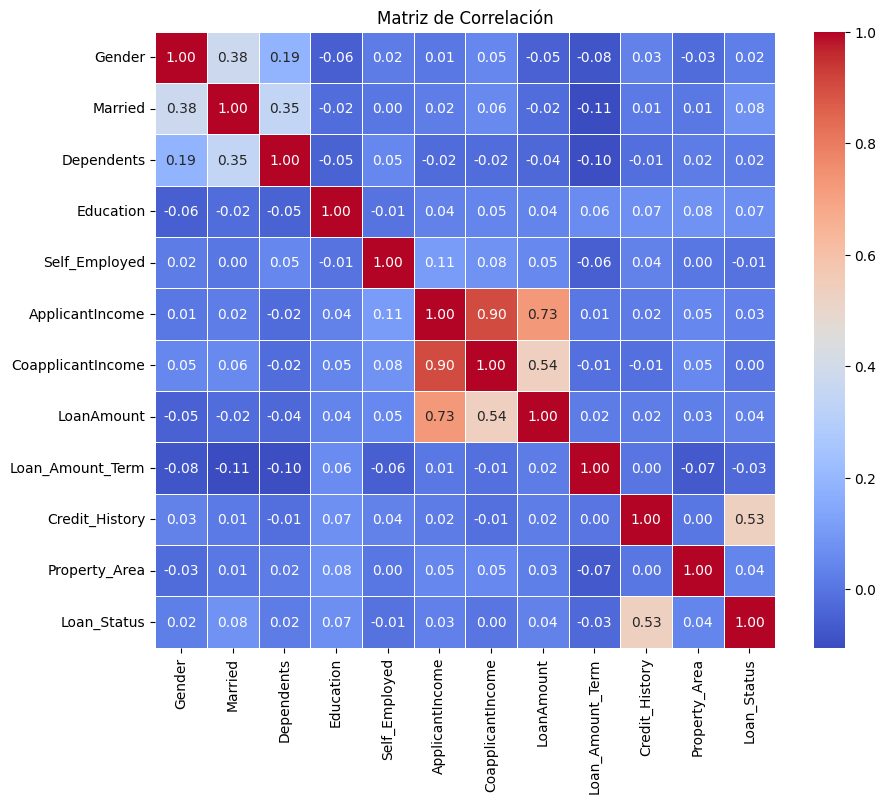

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear una visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

CONCLUSIONES OBTENIDAS EN BASE A NUESTRO ANALISIS

1) PARECIERA QUE EL FACTOR DETERMINANTE PARA QUE EL BANCO BRINDE UN PRESTAMO ES TENER UN HISTORIAL CREDITICIO, Y NO EL VALOR SOLICITADO, O EL INGRESO, O EL INGRESO DE LA GARANTIA,

2) EFECTIVAMENTE, HAY UNA RELACION ENTRE EL INGRESO Y EL PRESTAMO (LA GENTE CON MAYOR PLATA, SOLICITA LOS PRESTAMOS DE MAYOR MONTO)

3) RELACIONES INTERPERSONALES (LA GENTE DE MAYOR PODER ADQUISITIVO TIENE GARANTIAS ACORDES (CON GRAN PODER ADQUISITIVO)

A FIN DE DESPEJAR CUALQUIER DUDA, O GENERAR NUEVAS PERSPECTIVAS, SE PODRIA HACER UN MODELO DE MACHINE LEARNING PARA PROFUNDIZAR UN ANALISIS.